Best Hyperparameters: {'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 3, 'criterion': 'gini'}
Best Model Accuracy: 0.5


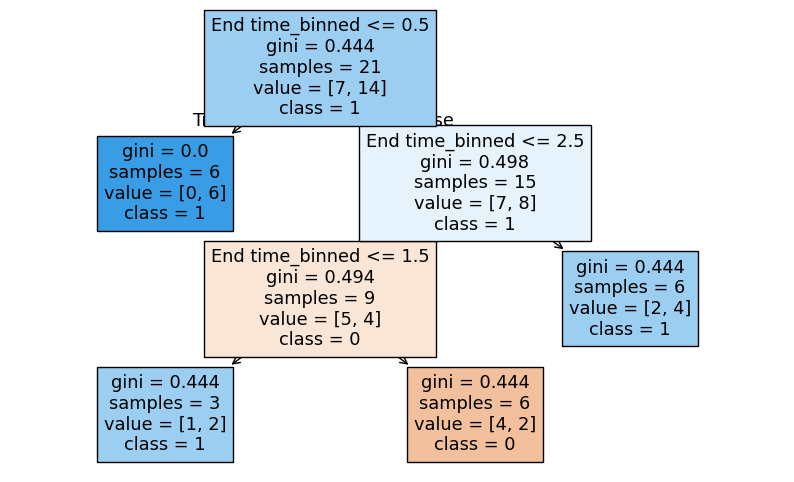

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


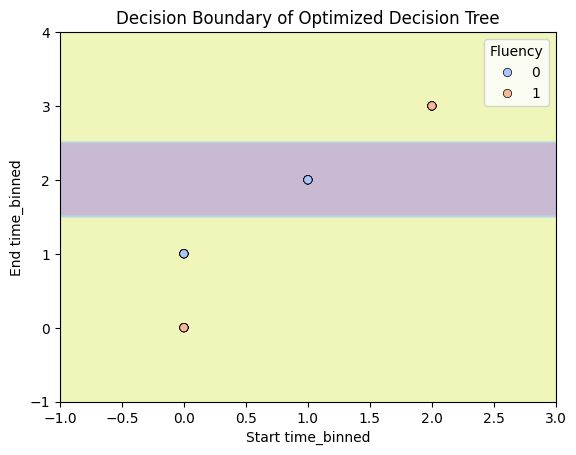

In [ ]:
#2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from math import log2
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder

# Function to calculate entropy
def entropy(y):
    counts = Counter(y)
    total = len(y)
    return -sum((count / total) * log2(count / total) for count in counts.values())

# Function to calculate Information Gain
def information_gain(data, feature, target):
    total_entropy = entropy(data[target])
    values, counts = np.unique(data[feature], return_counts=True)
    weighted_entropy = sum((counts[i] / sum(counts)) * entropy(data[data[feature] == values[i]][target]) for i in range(len(values)))
    return total_entropy - weighted_entropy

# Function for binning continuous features
def bin_continuous_feature(data, column, num_bins=3, method='equal_width'):
    """Bins a continuous feature using equal-width or equal-frequency binning."""
    if method not in ['equal_width', 'equal_frequency']:
        raise ValueError("Invalid binning method. Choose 'equal_width' or 'equal_frequency'.")

    if method == 'equal_width':
        data[column + '_binned'] = pd.cut(data[column], bins=num_bins, labels=False)
    else:  # equal_frequency
        data[column + '_binned'] = pd.qcut(data[column], q=num_bins, labels=False, duplicates='drop')

    return data

# Load and preprocess data
data = pd.read_excel("output_s234.xlsx", sheet_name="Sheet1")

# Binning continuous features
data = bin_continuous_feature(data, 'Start time')
data = bin_continuous_feature(data, 'End time', num_bins=4, method='equal_frequency')

# Encode categorical features
label_encoders = {}
for col in ['Start time_binned', 'End time_binned', 'Member', 'Fluency']:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Splitting dataset
X = data[['Start time_binned', 'End time_binned']]
y = data['Fluency']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define Decision Tree and hyperparameter grid
dt = DecisionTreeClassifier(random_state=42)
param_dist = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Apply RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(dt, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X_train, y_train)

# Print the best parameters
print("Best Hyperparameters:", random_search.best_params_)

# Train the best model
best_dt = random_search.best_estimator_
best_dt.fit(X_train, y_train)

# Evaluate performance
accuracy = best_dt.score(X_test, y_test)
print("Best Model Accuracy:", accuracy)

# Visualizing Decision Tree
plt.figure(figsize=(10, 6))
plot_tree(best_dt, feature_names=X.columns, class_names=[str(cls) for cls in np.unique(y)], filled=True)
plt.show()

# Plot Decision Boundary
def plot_decision_boundary(model, X, y):
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=y, palette='coolwarm', edgecolor='black', linewidth=0.5)
    plt.xlabel(X.columns[0])
    plt.ylabel(X.columns[1])
    plt.title("Decision Boundary of Optimized Decision Tree")
    plt.show()

# Plot decision boundary for the optimized model
plot_decision_boundary(best_dt, X, y)



 Tuning hyperparameters for SVM...
 Best parameters for SVM: {'kernel': 'linear', 'gamma': 'scale', 'C': 0.1}

 SVM Performance:
 Train Accuracy: 0.5148,  Test Accuracy: 0.5349
 Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.53      1.00      0.70        23
           2       0.00      0.00      0.00         5

    accuracy                           0.53        43
   macro avg       0.18      0.33      0.23        43
weighted avg       0.29      0.53      0.37        43

 Confusion Matrix:
 [[ 0 15  0]
 [ 0 23  0]
 [ 0  5  0]]
--------------------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


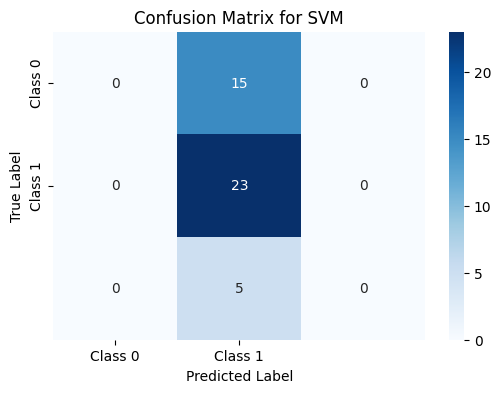


 Tuning hyperparameters for Decision Tree...
 Best parameters for Decision Tree: {'max_depth': 3, 'criterion': 'gini'}

 Decision Tree Performance:
 Train Accuracy: 0.5799,  Test Accuracy: 0.4884
 Classification Report:
               precision    recall  f1-score   support

           0       0.29      0.13      0.18        15
           1       0.53      0.83      0.64        23
           2       0.00      0.00      0.00         5

    accuracy                           0.49        43
   macro avg       0.27      0.32      0.28        43
weighted avg       0.38      0.49      0.41        43

 Confusion Matrix:
 [[ 2 13  0]
 [ 4 19  0]
 [ 1  4  0]]
--------------------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


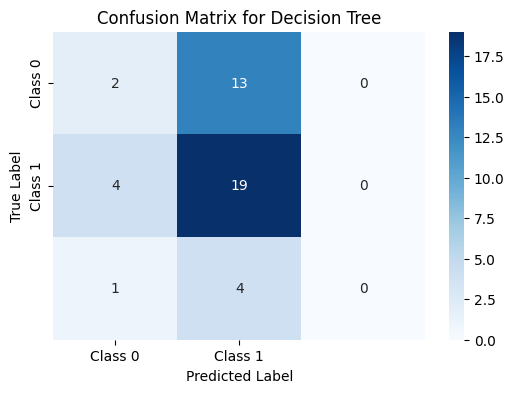


 Tuning hyperparameters for Random Forest...
 Best parameters for Random Forest: {'n_estimators': 100, 'min_samples_split': 5, 'max_depth': 10}

 Random Forest Performance:
 Train Accuracy: 0.8343,  Test Accuracy: 0.4186
 Classification Report:
               precision    recall  f1-score   support

           0       0.44      0.27      0.33        15
           1       0.58      0.61      0.60        23
           2       0.00      0.00      0.00         5

    accuracy                           0.42        43
   macro avg       0.34      0.29      0.31        43
weighted avg       0.47      0.42      0.43        43

 Confusion Matrix:
 [[ 4  6  5]
 [ 4 14  5]
 [ 1  4  0]]
--------------------------------------------------


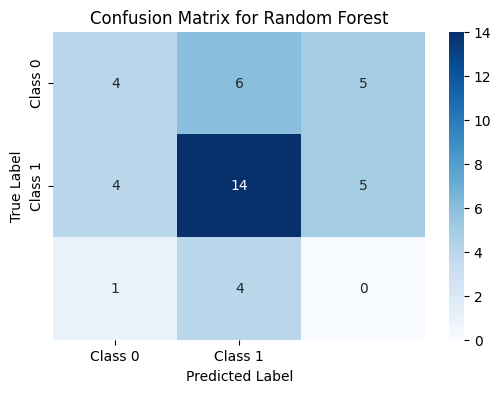


 Tuning hyperparameters for AdaBoost...


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 4 is smaller than n_iter=5. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


 Best parameters for AdaBoost: {'n_estimators': 50, 'learning_rate': 0.01}

 AdaBoost Performance:
 Train Accuracy: 0.5148,  Test Accuracy: 0.5349
 Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.53      1.00      0.70        23
           2       0.00      0.00      0.00         5

    accuracy                           0.53        43
   macro avg       0.18      0.33      0.23        43
weighted avg       0.29      0.53      0.37        43

 Confusion Matrix:
 [[ 0 15  0]
 [ 0 23  0]
 [ 0  5  0]]
--------------------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


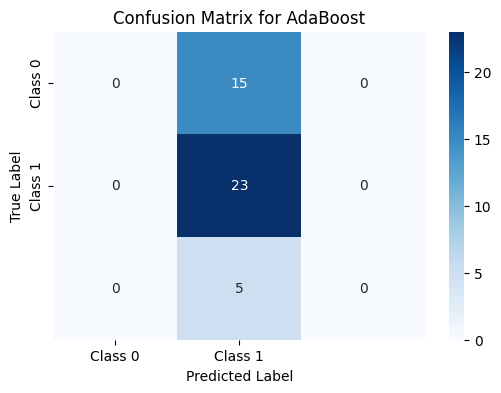


 Tuning hyperparameters for XGBoost...
 Best parameters for XGBoost: {'n_estimators': 50, 'max_depth': 3, 'learning_rate': 0.01}

 XGBoost Performance:
 Train Accuracy: 0.5976,  Test Accuracy: 0.4651
 Classification Report:
               precision    recall  f1-score   support

           0       0.29      0.13      0.18        15
           1       0.51      0.78      0.62        23
           2       0.00      0.00      0.00         5

    accuracy                           0.47        43
   macro avg       0.27      0.31      0.27        43
weighted avg       0.37      0.47      0.40        43

 Confusion Matrix:
 [[ 2 13  0]
 [ 4 18  1]
 [ 1  4  0]]
--------------------------------------------------


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:44:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


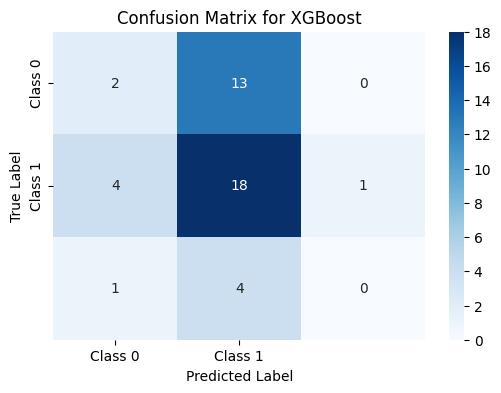


 Tuning hyperparameters for Naïve Bayes...

 Naïve Bayes Performance:
 Train Accuracy: 0.5148,  Test Accuracy: 0.5349
 Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.53      1.00      0.70        23
           2       0.00      0.00      0.00         5

    accuracy                           0.53        43
   macro avg       0.18      0.33      0.23        43
weighted avg       0.29      0.53      0.37        43

 Confusion Matrix:
 [[ 0 15  0]
 [ 0 23  0]
 [ 0  5  0]]
--------------------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


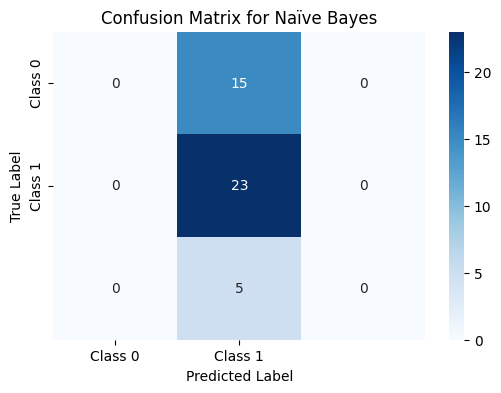


 Tuning hyperparameters for MLP...


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 2 is smaller than n_iter=5. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


 Best parameters for MLP: {'solver': 'adam', 'max_iter': 200, 'hidden_layer_sizes': (50,), 'activation': 'relu'}

 MLP Performance:
 Train Accuracy: 0.4320,  Test Accuracy: 0.4419
 Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.53      0.83      0.64        23
           2       0.00      0.00      0.00         5

    accuracy                           0.44        43
   macro avg       0.18      0.28      0.21        43
weighted avg       0.28      0.44      0.34        43

 Confusion Matrix:
 [[ 0 14  1]
 [ 0 19  4]
 [ 2  3  0]]
--------------------------------------------------


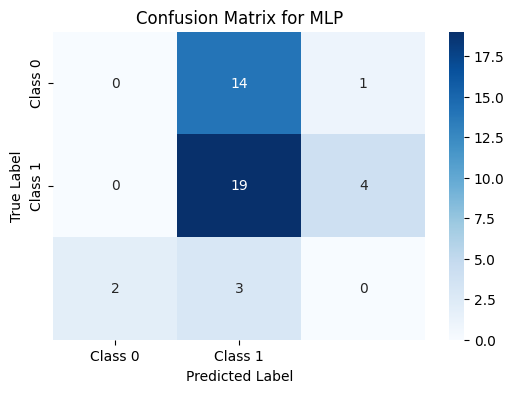


🔎 Final Results:
      Classifier  Train Accuracy  Test Accuracy  \
0            SVM        0.514793       0.534884   
1  Decision Tree        0.579882       0.488372   
2  Random Forest        0.834320       0.418605   
3       AdaBoost        0.514793       0.534884   
4        XGBoost        0.597633       0.465116   
5    Naïve Bayes        0.514793       0.534884   
6            MLP        0.431953       0.441860   

                                     Best Parameters  
0   {'kernel': 'linear', 'gamma': 'scale', 'C': 0.1}  
1              {'max_depth': 3, 'criterion': 'gini'}  
2  {'n_estimators': 100, 'min_samples_split': 5, ...  
3        {'n_estimators': 50, 'learning_rate': 0.01}  
4  {'n_estimators': 50, 'max_depth': 3, 'learning...  
5                                                N/A  
6  {'solver': 'adam', 'max_iter': 200, 'hidden_la...  


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
import glob

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, classifier_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix for {classifier_name}')
    plt.show()

# Load and combine multiple Excel files
file_paths = glob.glob("output_s*.xlsx")
data_list = [pd.read_excel(file, sheet_name="Sheet1") for file in file_paths]
data = pd.concat(data_list, ignore_index=True)

# Encode categorical features
label_encoders = {}
for col in ['Start time', 'End time', 'Member', 'Fluency']:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Splitting dataset
X = data[['Start time', 'End time']]
y = data['Fluency']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Optimized hyperparameter grids
param_grids = {
    'SVM': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale']
    },
    'Decision Tree': {
        'max_depth': [3, 5, 10],
        'criterion': ['gini', 'entropy']
    },
    'Random Forest': {
        'n_estimators': [50, 100],
        'max_depth': [None, 10],
        'min_samples_split': [2, 5]
    },
    'AdaBoost': {
        'n_estimators': [50, 100],
        'learning_rate': [0.01, 0.1]
    },
    'XGBoost': {
        'n_estimators': [50, 100],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 6]
    },
    'MLP': {
        'hidden_layer_sizes': [(50,), (100,)],
        'activation': ['relu'],
        'solver': ['adam'],
        'max_iter': [200]
    }
}

# Define classifiers
classifiers = {
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'Naïve Bayes': GaussianNB(),
    'MLP': MLPClassifier()
}

# Store results
results = []
best_params_dict = {}

# Train and evaluate classifiers with faster tuning
for name, clf in classifiers.items():
    print(f"\n Tuning hyperparameters for {name}...")

    if name in param_grids:
        search = RandomizedSearchCV(
            clf, param_distributions=param_grids[name],
            n_iter=5,  # Reduced from 10 to 5
            scoring='accuracy',
            cv=3,  # Reduced from 5 to 3
            n_jobs=-1,
            random_state=42
        )
        search.fit(X_train, y_train)
        best_clf = search.best_estimator_
        best_params_dict[name] = search.best_params_
        print(f" Best parameters for {name}: {search.best_params_}")
    else:
        best_clf = clf
        best_clf.fit(X_train, y_train)
        best_params_dict[name] = "N/A"

    # Evaluate
    y_pred_train = best_clf.predict(X_train)
    y_pred_test = best_clf.predict(X_test)

    train_acc = accuracy_score(y_train, y_pred_train)
    test_acc = accuracy_score(y_test, y_pred_test)
    class_report = classification_report(y_test, y_pred_test)
    conf_matrix = confusion_matrix(y_test, y_pred_test)

    results.append({
        'Classifier': name,
        'Train Accuracy': train_acc,
        'Test Accuracy': test_acc,
        'Best Parameters': best_params_dict[name]
    })

    print(f"\n {name} Performance:")
    print(f" Train Accuracy: {train_acc:.4f},  Test Accuracy: {test_acc:.4f}")
    print(" Classification Report:\n", class_report)
    print(" Confusion Matrix:\n", conf_matrix)
    print("-" * 50)

    plot_confusion_matrix(y_test, y_pred_test, name)

# Convert results to DataFrame
results_df = pd.DataFrame(results)
print("\n🔎 Final Results:")
print(results_df[['Classifier', 'Train Accuracy', 'Test Accuracy', 'Best Parameters']])

